In [24]:
from keras.preprocessing.image import ImageDataGenerator
from keras.datasets import mnist
from matplotlib import pyplot
import os
from keras import backend as K
K.set_image_dim_ordering('th')

In [25]:

# Plot images

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# create a grid of 3x3 images
'''for i in range(0, 9):
	pyplot.subplot(330 + 1 + i)
	pyplot.imshow(X_train[i], cmap=pyplot.get_cmap('gray'))
# show the plot
pyplot.show()'''

"for i in range(0, 9):\n\tpyplot.subplot(330 + 1 + i)\n\tpyplot.imshow(X_train[i], cmap=pyplot.get_cmap('gray'))\n# show the plot\npyplot.show()"

In [26]:
X_train.shape

(60000, 28, 28)

In [27]:
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)

In [28]:
X_train.shape

(60000, 1, 28, 28)

In [29]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train.shape

(60000, 1, 28, 28)

## featurewise_center & featurewise_std_normalization
It is also possible to standardize pixel values across the entire dataset. This is called feature standardization and mirrors the type of standardization often performed for each column in a tabular dataset.

You can perform feature standardization by setting the featurewise_center and featurewise_std_normalization arguments on the ImageDataGenerator class. These are in fact set to True by default and creating an instance of ImageDataGenerator with no arguments will have the same effect.

In [30]:
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)

## zca_whitening
A whitening transform of an image is a linear algebra operation that reduces the redundancy in the matrix of pixel images.

Less redundancy in the image is intended to better highlight the structures and features in the image to the learning algorithm.

Typically, image whitening is performed using the Principal Component Analysis (PCA) technique. More recently, an alternative called ZCA (learn more in Appendix A of this tech report) shows better results and results in transformed images that keeps all of the original dimensions and unlike PCA, resulting transformed images still look like their originals.

You can perform a ZCA whitening transform by setting the zca_whitening argument to True.

In [31]:
datagen = ImageDataGenerator(zca_whitening=True)

/root/.local/lib/python3.6/site-packages/keras_preprocessing/image.py:836: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


## rotation 
Sometimes images in your sample data may have varying and different rotations in the scene.

You can train your model to better handle rotations of images by artificially and randomly rotating images from your dataset during training.

The example below creates random rotations of the MNIST digits up to 90 degrees by setting the rotation_range argument.

In [32]:
datagen = ImageDataGenerator(rotation_range=180)

## Random Shifts
Objects in your images may not be centered in the frame. They may be off-center in a variety of different ways.

You can train your deep learning network to expect and currently handle off-center objects by artificially creating shifted versions of your training data. Keras supports separate horizontal and vertical random shifting of training data by the width_shift_range and height_shift_range arguments.

In [21]:
datagen = ImageDataGenerator(width_shift_range=0.5, height_shift_range=0.5)

## Random Flips
Another augmentation to your image data that can improve performance on large and complex problems is to create random flips of images in your training data.

Keras supports random flipping along both the vertical and horizontal axes using the vertical_flip and horizontal_flip arguments.

In [33]:
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)

In [34]:
datagen.fit(X_train)

## plot result

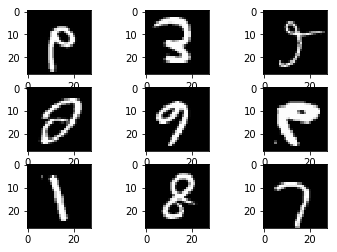

In [35]:
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
	# create a grid of 3x3 images
	for i in range(0, 9):
		pyplot.subplot(330 + 1 + i)
		pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
	# show the plot
	pyplot.show()
	break

## Saving Augmented Images to File
The data preparation and augmentation is performed just in time by Keras.

This is efficient in terms of memory, but you may require the exact images used during training. For example, perhaps you would like to use them with a different software package later or only generate them once and use them on multiple different deep learning models or configurations.

Keras allows you to save the images generated during training. The directory, filename prefix and image file type can be specified to the flow() function before training. Then, during training, the generated images will be written to file.

The example below demonstrates this and writes 9 images to a “images” subdirectory with the prefix “aug” and the file type of PNG.



In [ ]:
#os.makedirs('pre-images') #for making dir
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9, save_to_dir='pre-images', save_prefix='aug', save_format='png'):
   
    # create a grid of 3x3 images
    
    for i in range(0, 9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
    # show the plot
    pyplot.show()
    break
    